In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('individual data sets/yoga.csv')

In [3]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,TrikonaAsana,0.658107,0.399988,-0.232685,0.999985,0.670482,0.406888,-0.234085,0.999936,0.671605,...,0.081472,0.993228,0.714445,0.882579,0.206206,0.901431,0.231325,0.902276,-0.034461,0.994783
1,TrikonaAsana,0.657797,0.401103,-0.232699,0.999983,0.670214,0.408072,-0.232902,0.999924,0.671432,...,0.029949,0.993468,0.716077,0.883021,0.225300,0.906267,0.232438,0.902466,-0.092808,0.994897
2,TrikonaAsana,0.657303,0.401405,-0.230929,0.999982,0.669726,0.408260,-0.229953,0.999913,0.671034,...,0.033274,0.993691,0.717033,0.883258,0.223532,0.911113,0.233140,0.902528,-0.088684,0.994986
3,TrikonaAsana,0.656615,0.401957,-0.230326,0.999981,0.669127,0.408609,-0.228878,0.999904,0.670539,...,0.030369,0.993931,0.717905,0.883356,0.222961,0.915716,0.234691,0.902397,-0.092079,0.995101
4,TrikonaAsana,0.656238,0.402549,-0.229423,0.999980,0.668835,0.409033,-0.227699,0.999897,0.670289,...,0.027389,0.994167,0.718261,0.883414,0.220368,0.919866,0.235331,0.902307,-0.095637,0.995226


In [4]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value
y

0          TrikonaAsana
1          TrikonaAsana
2          TrikonaAsana
3          TrikonaAsana
4          TrikonaAsana
              ...      
13844    ArdhChakrAsana
13845    ArdhChakrAsana
13846    ArdhChakrAsana
13847    ArdhChakrAsana
13848    ArdhChakrAsana
Name: class, Length: 13849, dtype: object

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import *
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11079, 132), (2770, 132), (11079,), (2770,))

In [7]:
df.isna().sum()

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v32      0
x33      0
y33      0
z33      0
v33      0
Length: 133, dtype: int64

## Training and Evaluating on CNN and RF


In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=2)
model.fit(X_train,y_train)
model.score(X_train,y_train)*100   #score basically returns the mean accuracy on the given test data and labels


99.99097391461324

In [10]:
model.score(X_test,y_test)*100

99.85559566787003

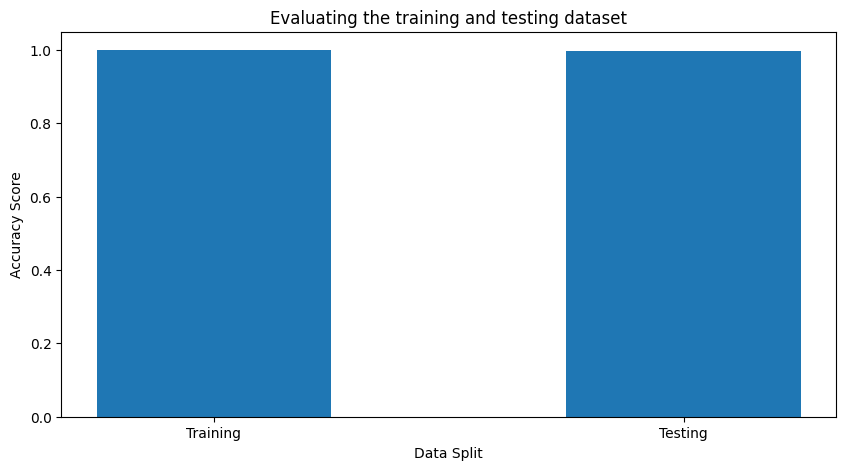

In [11]:

a = model.score(X_train,y_train) 
b = model.score(X_test,y_test)
data = {'Training':a,'Testing':b}
train = list(data.keys())
acc = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train,acc,
        width = 0.5)
 
plt.xlabel("Data Split")
plt.ylabel("Accuracy Score")
plt.title("Evaluating the training and testing dataset")
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y)

array([0.68772563, 0.88844765, 0.91588448, 0.94259928, 0.72336584])

In [13]:
#compare score and cross_validation_score
score_model = model.score(X_test,y_test)
cross_val_score_model = np.mean(cross_val_score(model,X,y))

score_model,cross_val_score_model

(0.9985559566787003, 0.9130593353698047)

In [14]:

print(f"Final Accuracy of our ML model: {cross_val_score_model*100:.2f}%")

Final Accuracy of our ML model: 91.31%


## Confusion matrix

In [15]:
from sklearn.metrics import *
y_preds = model.predict(X_test)
confusion_matrix(y_test,y_preds)
pd.crosstab(y_test,y_preds,rownames=['actual labels'],colnames=['predicted'])

predicted,ArdhChakrAsana,BhujangAsana,PadahastAsana,SetuBandhAsana,ShavaAsana,TadaAsana,TrikonaAsana,VrikshAsana
actual labels,,,,,,,,
ArdhChakrAsana,416,0,0,0,0,0,0,0
BhujangAsana,0,275,0,0,0,0,0,0
PadahastAsana,0,0,328,0,0,0,0,0
SetuBandhAsana,0,0,0,381,0,0,0,0
ShavaAsana,0,0,0,0,293,0,0,0
TadaAsana,0,0,0,0,0,324,0,2
TrikonaAsana,0,0,0,0,0,2,421,0
VrikshAsana,0,0,0,0,0,0,0,328


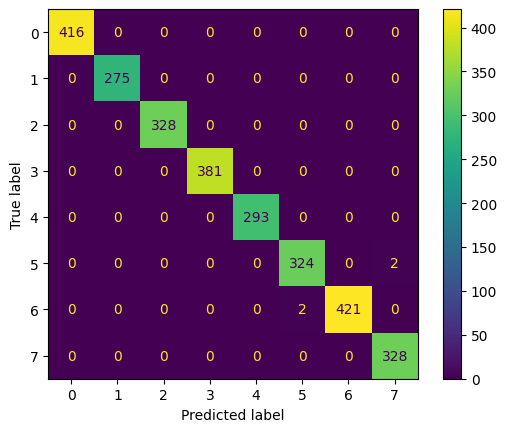

In [19]:

prediction = model.predict(X_test)
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

c:\Users\omkri\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


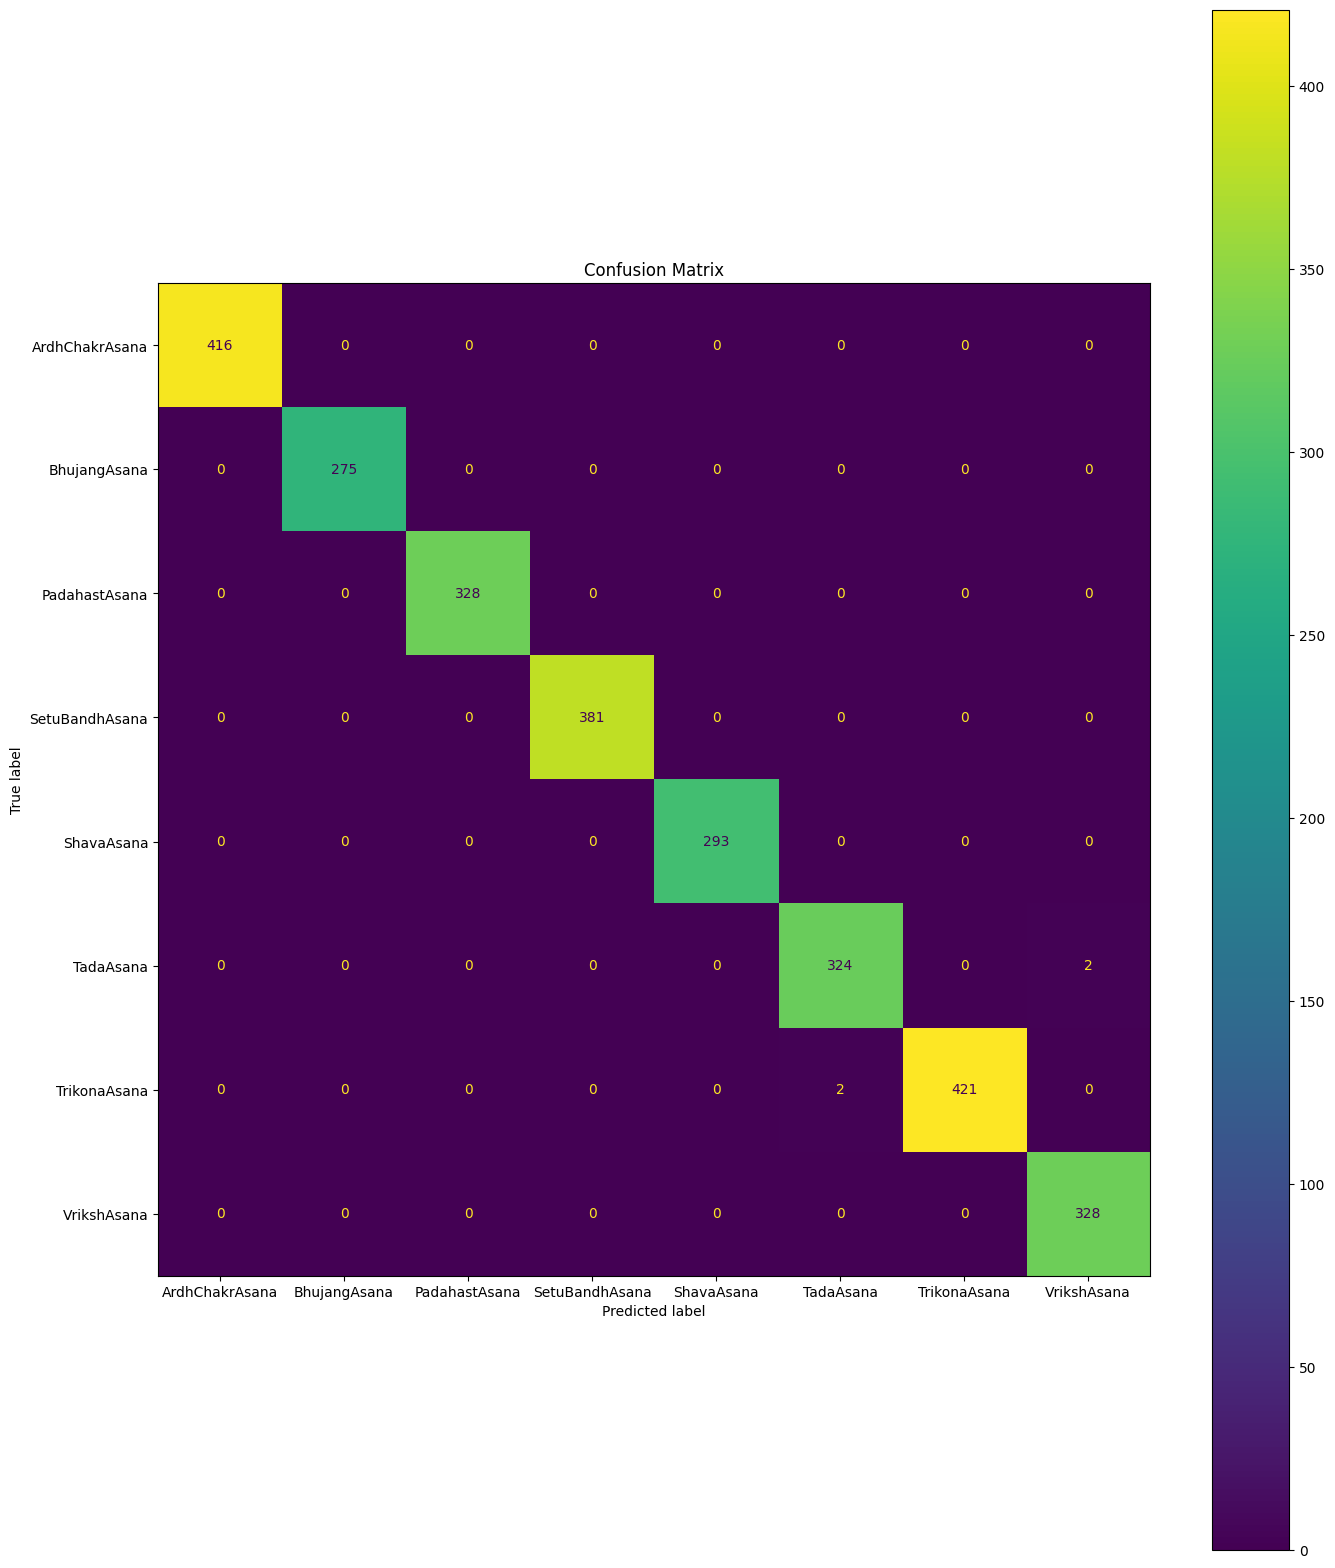

In [24]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(16, 20))
plot_confusion_matrix(model, X_test, y_test, ax=ax)
ax.set_title("Confusion Matrix")
plt.show()

In [18]:
from sklearn.metrics import *
print(classification_report(y_test,y_preds))

                precision    recall  f1-score   support

ArdhChakrAsana       1.00      1.00      1.00       416
  BhujangAsana       1.00      1.00      1.00       275
 PadahastAsana       1.00      1.00      1.00       328
SetuBandhAsana       1.00      1.00      1.00       381
    ShavaAsana       1.00      1.00      1.00       293
     TadaAsana       0.99      0.99      0.99       326
  TrikonaAsana       1.00      1.00      1.00       423
   VrikshAsana       0.99      1.00      1.00       328

      accuracy                           1.00      2770
     macro avg       1.00      1.00      1.00      2770
  weighted avg       1.00      1.00      1.00      2770

